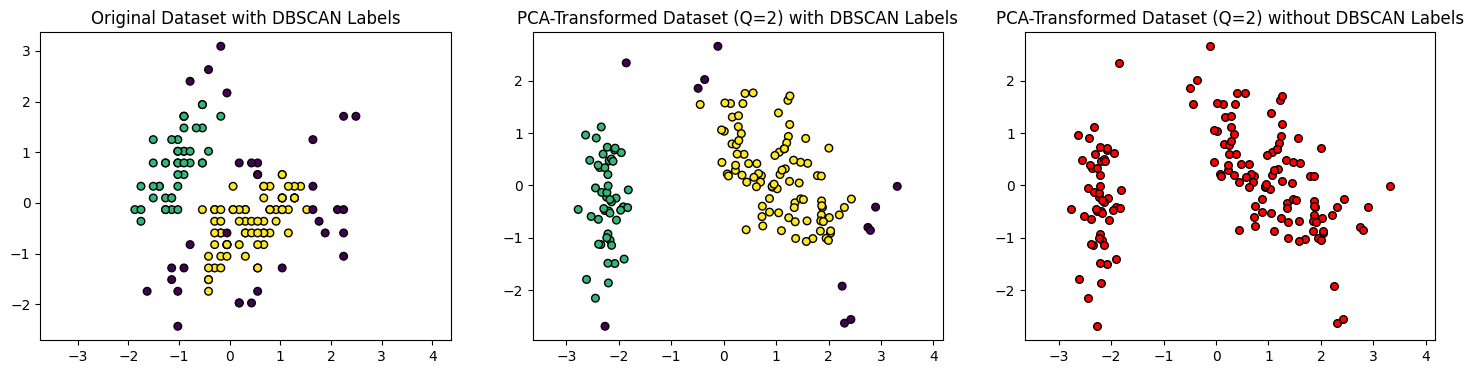

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# Standardize the features
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Calculate the covariance matrix
cov_matrix = np.dot(X_standardized.T, X_standardized) / (X_standardized.shape[0] - 1)

# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort indices of eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]

# Sort eigenvectors in descending order of eigenvalues
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the top Q eigenvalues and eigenvectors
Q = 2  # Choose the best Q (in this case, Q=2)

# Projected dataset (for pca)
X_pca = np.dot(X_standardized, eigenvectors[:, :Q])


# implement DBSCAN from scratch
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

#specifies the minimum number of data points required to form a dense region (core point)
def DBSCAN(X, eps, MinPoints):
    # get the number of samples and features (150,4)
    n_samples, n_features = X.shape
    #Initialize an array to store cluster labels for each data point
    #Initially, all points are labeled as 0 (unassigned)
    labels = np.zeros(n_samples, dtype=int)
    cluster_id = 0

    #Iterate over each data point
    for i in range(n_samples):
        #Skip points that are already assigned to a cluster0
        if labels[i] != 0:
            continue

        # Initialize an empty list to store indices of neighbors of the current data point
        neighbors = []
        for j in range(n_samples):
            #Check if the Euclidean distance between the current point and another point is less than epsilon
            if euclidean_distance(X[i], X[j]) < eps:
                neighbors.append(j)  #If true, add the index of the neighbor to the neighbors list
        # If the current point doesn't have enough neighbors
        if len(neighbors) < MinPoints:
            labels[i] = -1  # Mark as outlier
        else:                          #If point has enough neighbors
            cluster_id += 1            #increment cluster ID
            labels[i] = cluster_id     # assign current point to new cluster
            expand_cluster(X, labels, i, neighbors, cluster_id, eps, MinPoints)

    return labels

def expand_cluster(X, labels, point_index, neighbors, cluster_id, eps, MinPoints):
    #Iterate over the neighbors of the current data point
    for neighbor in neighbors:
        if labels[neighbor] == -1:  #reclassifies the noise point as part of the cluster
            #change its label to the current cluster ID
            labels[neighbor] = cluster_id  # Change outlier point to border point
        elif labels[neighbor] == 0: # checks if the neighbor has not been assigned to any cluster yet, add it to the current cluster
            labels[neighbor] = cluster_id
            # Initialize a list to store indices of new neighbors found within eps distance
            new_neighbors = []
            for j in range(len(X)): # Iterate over all data points
                if euclidean_distance(X[neighbor], X[j]) < eps:
                    new_neighbors.append(j)  #the data point at index j is a new neighbor
            if len(new_neighbors) >= MinPoints:
                ##f the number of new neighbors found is greater than or equal to MinPoints,
                # these new neighbors are considered for further potential cluster expansion
                neighbors.extend(new_neighbors)



# DBSCAN parameters
eps = 0.5
MinPoints = 5

# Apply DBSCAN on the original dataset
labels_original = DBSCAN(X_standardized, eps, MinPoints)

# Apply DBSCAN on the PCA-transformed dataset
labels_pca = DBSCAN(X_pca, eps, MinPoints)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Original dataset with DBSCAN labels
axes[0].scatter(X_standardized[:, 0], X_standardized[:, 1], c=labels_original, marker='o', s=30, edgecolor='k', cmap='viridis')
axes[0].set_title('Original Dataset with DBSCAN Labels')
axes[0].axis('equal')

# PCA-transformed dataset with DBSCAN labels
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, marker='o', s=30, edgecolor='k', cmap='viridis')
axes[1].set_title(f'PCA-Transformed Dataset (Q={Q}) with DBSCAN Labels')
axes[1].axis('equal')

# PCA-transformed dataset without DBSCAN labels
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c='r', marker='o', s=30, edgecolor='k')
axes[2].set_title(f'PCA-Transformed Dataset (Q={Q}) without DBSCAN Labels')
axes[2].axis('equal')

plt.show()

